Top 10 frequent keywords in best sellers:
 laptop    29
ssd       15
11        12
i5        11
intel     11
14        11
lenovo    11
i7        10
ram       10
core      10
dtype: int64


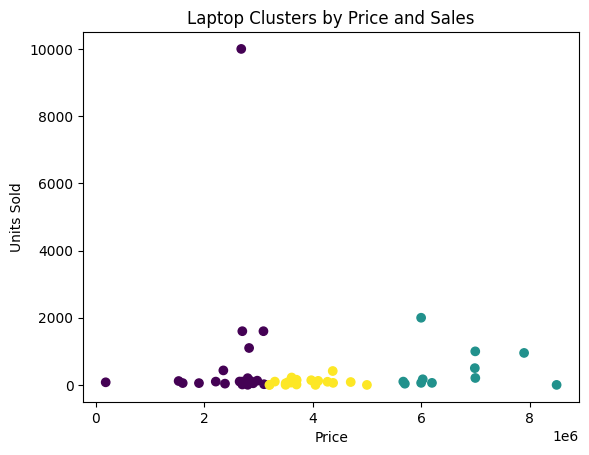

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer

# Load and clean data
df = pd.read_excel("Laptop___1719332569.xlsx", sheet_name="SheetJS")
df['Price'] = df['Price'].str.replace('.', '', regex=False).astype(int)

def parse_sell(s):
    if pd.isna(s): return np.nan
    s = s.lower().replace('terjual', '').replace('+', '').strip()
    if 'rb' in s:
        return float(s.replace('rb', '').replace(',', '.')) * 1000
    return float(s.replace(',', ''))

df['Sell'] = df['Sell'].apply(parse_sell)

# Drop rows with missing sell data
df = df.dropna(subset=['Sell'])

# Clustering based on Price & Sell
X = df[['Price', 'Sell']]
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Regression
model = LinearRegression()
model.fit(df[['Price']], df['Sell'])
df['Predicted_Sell'] = model.predict(df[['Price']])

# Frequent title words in top-selling laptops
high_sellers = df[df['Sell'] > df['Sell'].median()]
vectorizer = CountVectorizer(stop_words='english')
X_title = vectorizer.fit_transform(high_sellers['Title'])
word_freq = pd.DataFrame(X_title.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Show top 10 frequent words
print("Top 10 frequent keywords in best sellers:\n", word_freq.head(10))

# Plot clustering
plt.scatter(df['Price'], df['Sell'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.title("Laptop Clusters by Price and Sales")
plt.show()